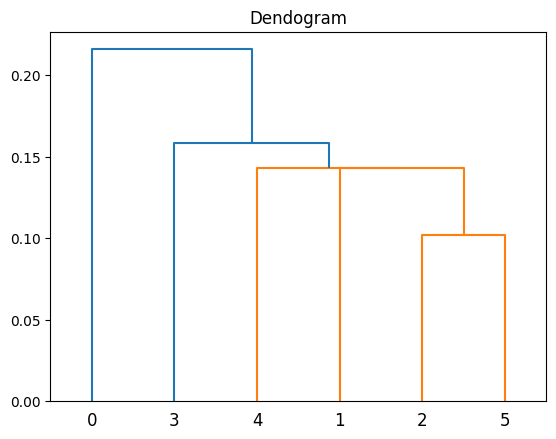

In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from scipy.cluster.hierarchy import linkage,dendrogram

df = pd.read_csv('data1.csv')

def compute_euclidean_distance(x1,y1,x2,y2):
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

def compute_distance_matrix(df):
    n = len(df)
    dist_mat = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            dist_mat[i,j] = compute_euclidean_distance(df[i][0],df[i][1],df[j][0],df[j][1])
    return dist_mat

def clustering(df):
    n = len(df)
    clusters = [[i] for i in range(n)]
    dist_mat = compute_distance_matrix(df.values)
    np.fill_diagonal(dist_mat, np.inf)
    while len(clusters) > 1:
        i, j = np.where(dist_mat == np.min(dist_mat))
        i, j = i[0], j[0]
        
        # Merge clusters
        clusters[i].extend(clusters[j])
        clusters.pop(j)
        
        # Update the distance matrix
        for k in range(len(dist_mat)):
            if k != i and k != j:
                merged_dist = min(dist_mat[i, k], dist_mat[j, k])
                dist_mat[i, k] = merged_dist
                dist_mat[k, i] = merged_dist
        
        # Remove the merged cluster from the distance matrix
        dist_mat = np.delete(dist_mat, j, axis=0)
        dist_mat = np.delete(dist_mat, j, axis=1)
        
    return clusters[0]

cluster = clustering(df)
cluster
z = linkage(df,method='single',metric='euclidean')
dendrogram(z)
plt.title('Dendogram')
plt.show()